<b>Loading Libraries</b>

In [ ]:
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install scipy
%pip install missingno
%pip install scikit-learn

<b>Importing Libraries</b>

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

'''ML'''
from sklearn.experimental import enable_iterative_imputer  # Enable experimental imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

'''Chi-square test'''
from scipy.stats import chi2_contingency

'''T-test'''
from scipy.stats import ttest_ind

<b>Setting a style makes plots look better</b>

In [164]:
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

<b>The Titanic Dataset</b>

In [165]:
data = sns.load_dataset('titanic')

<b>Loading the data</b>

In [166]:
print(f"Dataset loaded successfully!")
print(f"Shape: {data.shape[0]} rows, {data.shape[1]} columns")

Dataset loaded successfully!
Shape: 891 rows, 15 columns


<b>Preview</b>

In [167]:
display(data)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<b>Dataset Overview</b>

In [168]:
print("Shape of the dataset:", data.shape)

print("\nColumns in the dataset:\n", data.columns)


Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


<b>Checking for missing data - learned this is important!</b>

In [169]:
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

Missing Values Summary:
         Column  Missing_Count  Missing_Percentage
11         deck            688           77.216611
3           age            177           19.865320
7      embarked              2            0.224467
12  embark_town              2            0.224467


<b>Visualizing missing values</b>

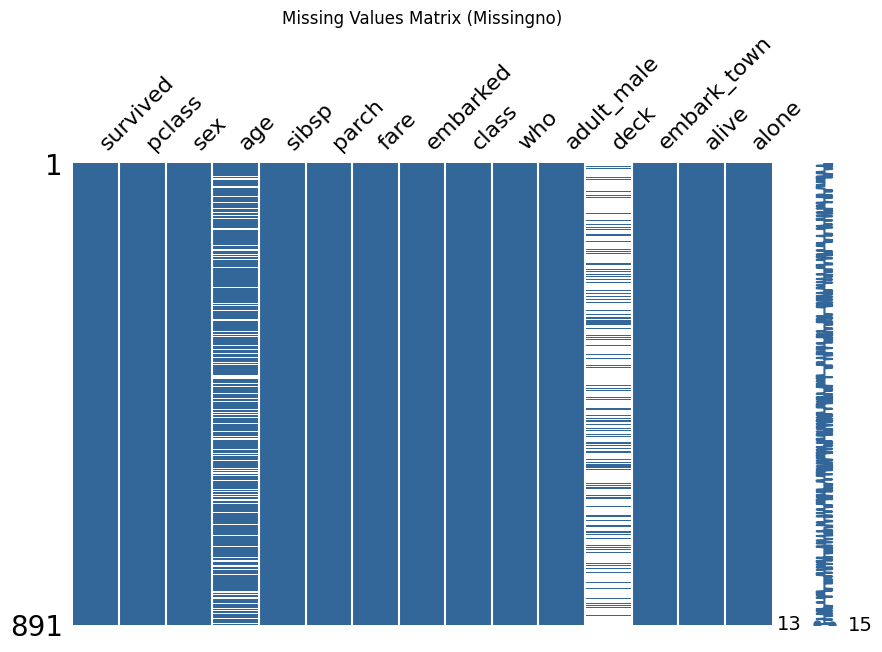

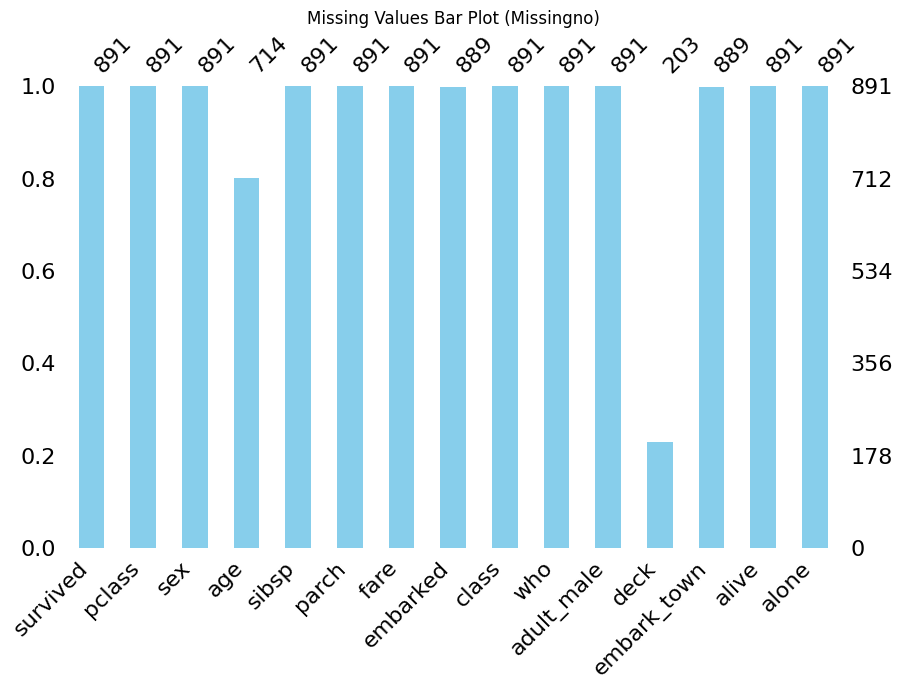

In [170]:
'''
The Matrix plot is like a visual "map" of your data's completeness.
It shows where the missing pieces are across all your columns and rows.
What to look for:
-> Colored areas : These are the actual data points.
-> White spaces : These are the missing values (the gaps).
-> Sparkline on the right : This mini-graph shows how complete each row is.
A full line means the row has no missing data.
'''
msno.matrix(data, figsize=(10, 6), color=(0.2, 0.4, 0.6))
plt.title('Missing Values Matrix (Missingno)')
plt.show()

'''
The Bar plot gives you a clear count of how much data is actually present and not missing in each of your columns.
What to look for:
-> Height of each bar : This tells you the number of entries that are not missing in that specific column.
-> Gap above the bar : This represents the number of missing values for that column.
A shorter bar means more missing data in that column
'''
msno.bar(data, figsize=(10, 6), color='skyblue')
plt.title('Missing Values Bar Plot (Missingno)')
plt.show()

<b>Impute Missing Values</b>

In [171]:
# Identifing column types
num_cols = data.select_dtypes(include=['number']).columns
cat_cols = data.select_dtypes(exclude=['number']).columns

# Impute numercial feature
rf_model = RandomForestRegressor()
num_imputer = IterativeImputer(estimator=rf_model, random_state=0)

# Applying the imputer
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Filling each categorical column with its mode (most frequent value)
for col in cat_cols:
    most_common = data[col].mode()[0]
    data[col] = data[col].fillna(most_common)
    
# Final check for missing values
print("\nRemaining Missing Values (if any):\n")
print(data.isnull().sum())


Remaining Missing Values (if any):

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


<b>Data Distribution Analysis</b>

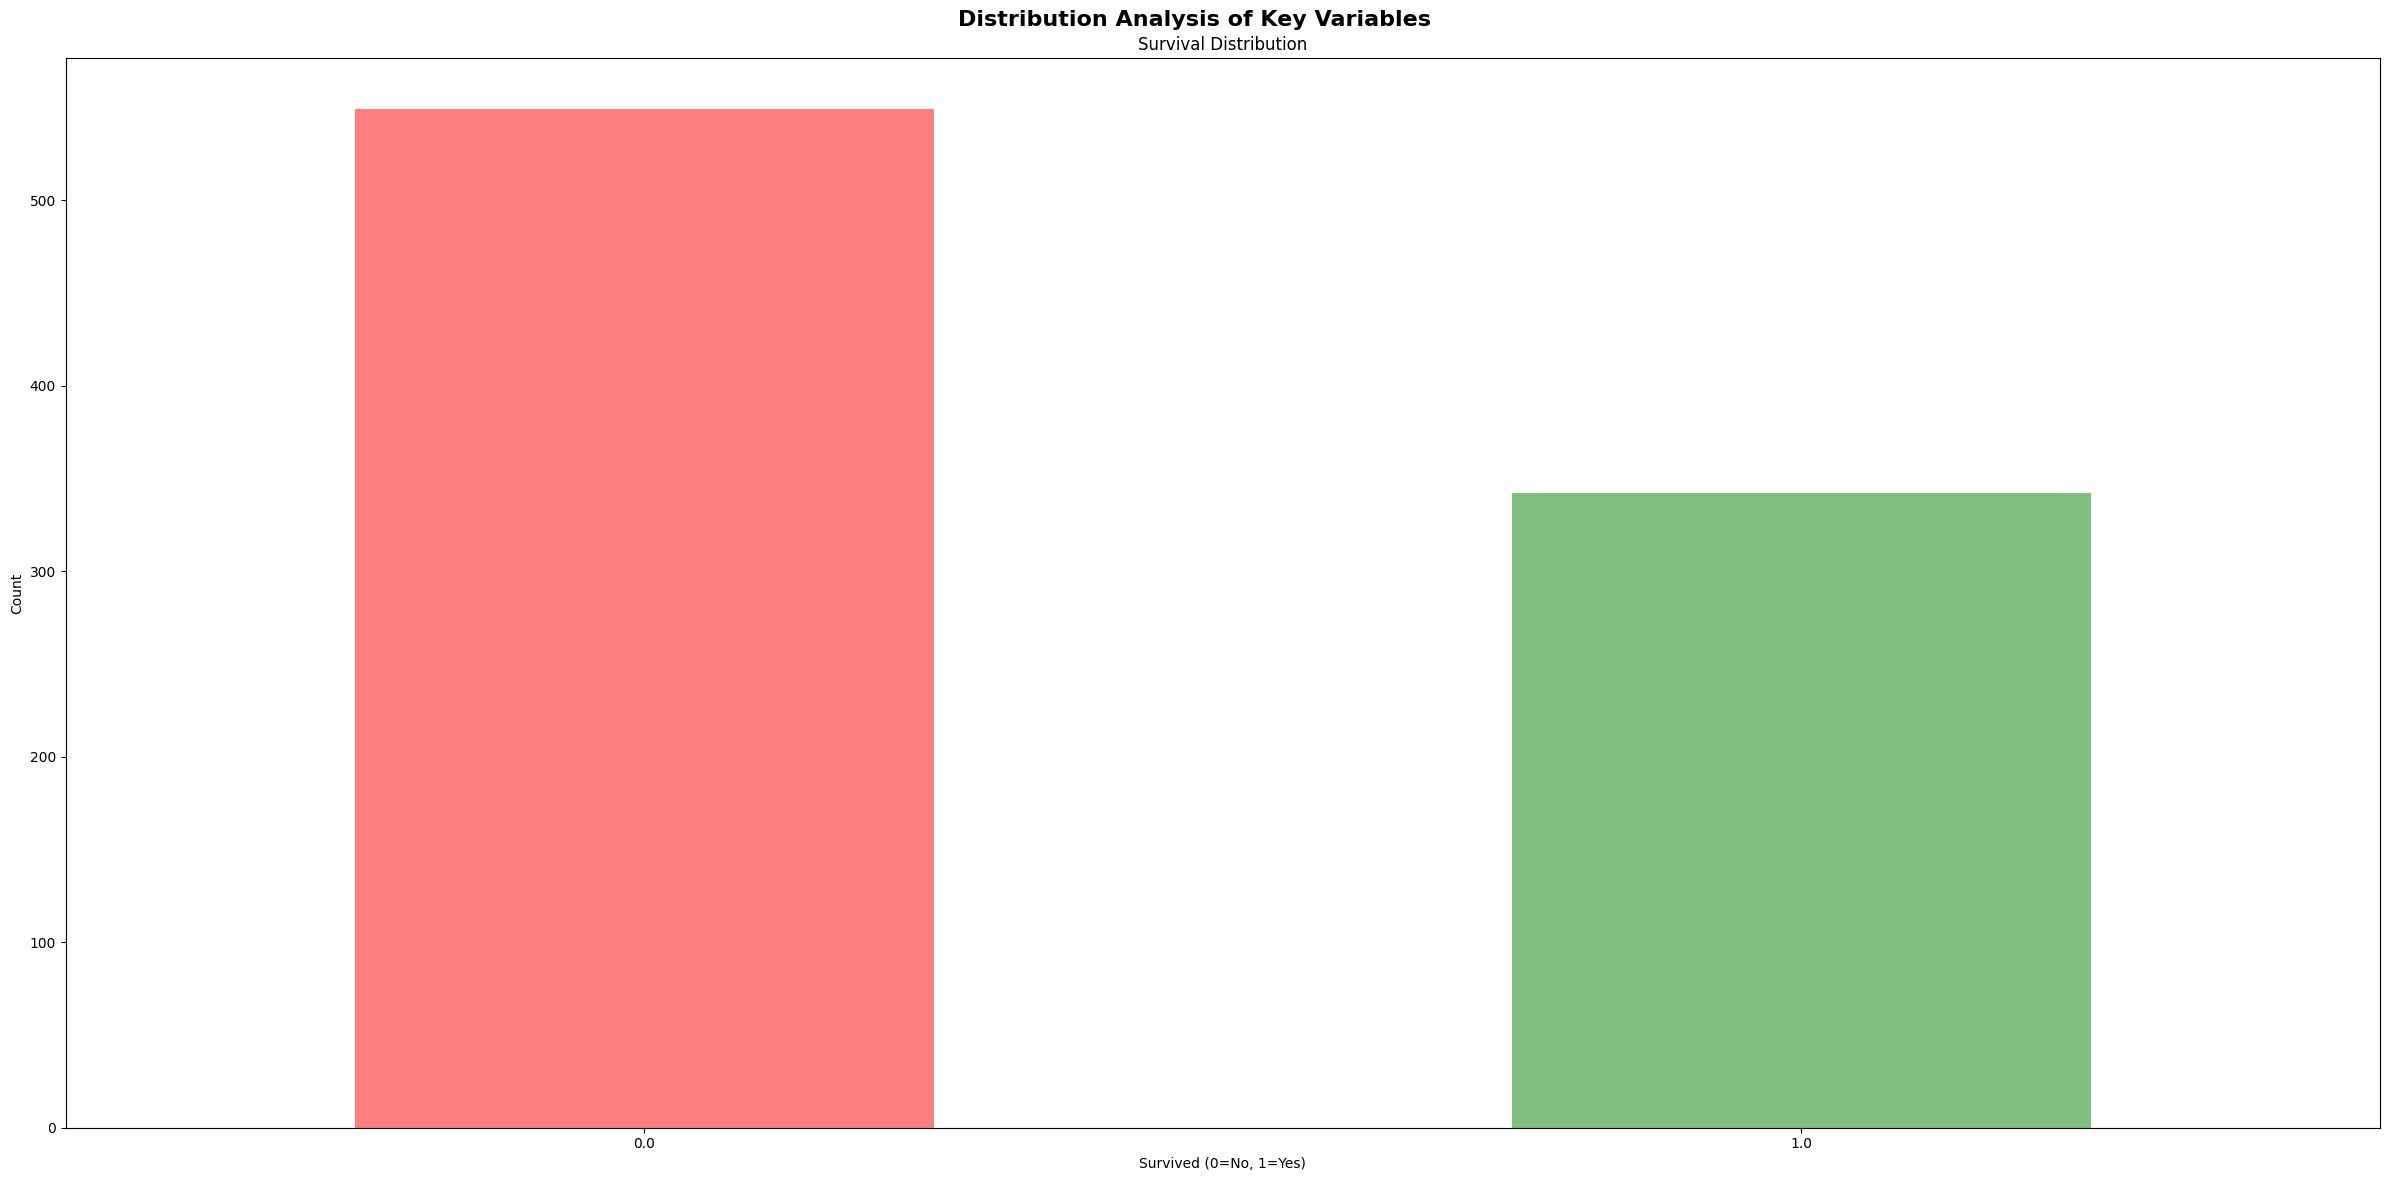

In [172]:
fig, ax1 = plt.subplots(1, 1, figsize=(24, 12))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')

# 1. Survival distribution
data['survived'].value_counts().plot(kind='bar', ax=ax1, color=['#ff7f7f', '#7fbf7f'])
ax1.set_title('Survival Distribution')
ax1.set_xlabel('Survived (0=No, 1=Yes)')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


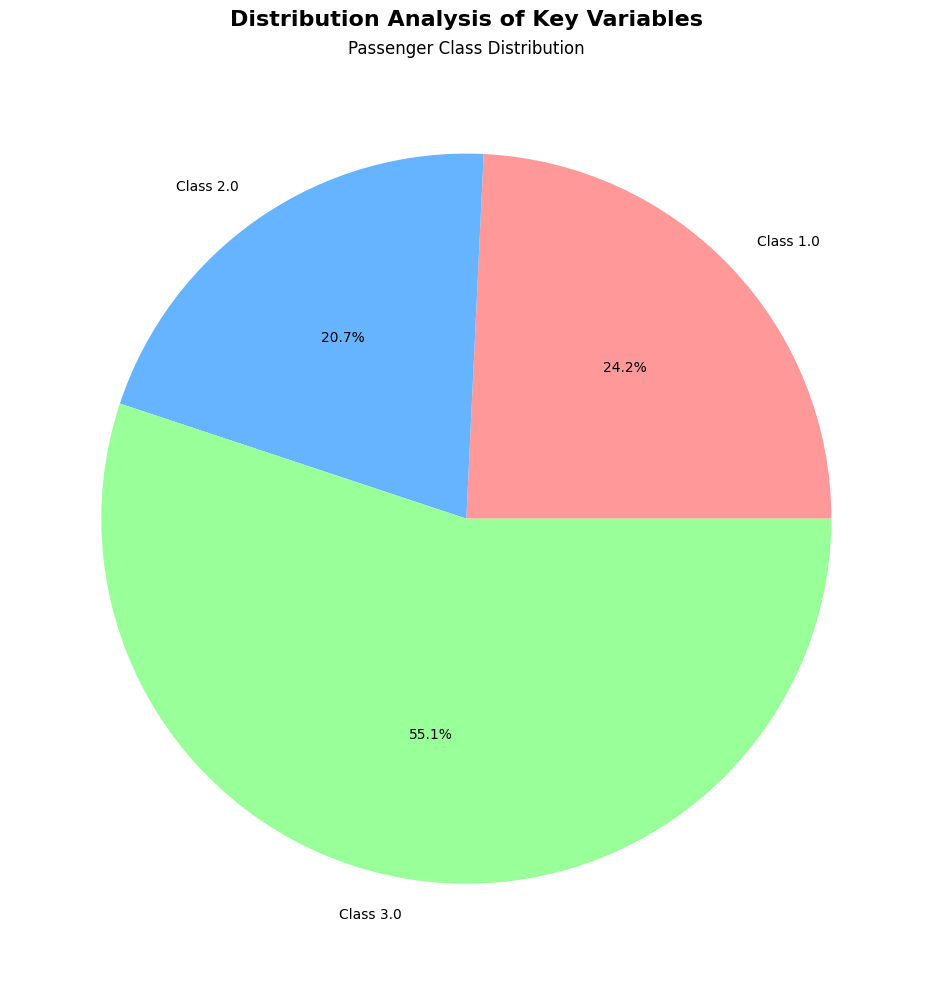

In [173]:
fig, ax2 = plt.subplots(1, 1, figsize=(14, 10))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')

# 2. Passenger Class distribution
class_counts = data['pclass'].value_counts().sort_index()
ax2.pie(class_counts.values, labels=[f'Class {i}' for i in class_counts.index], 
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
ax2.set_title('Passenger Class Distribution')

plt.tight_layout()
plt.show()

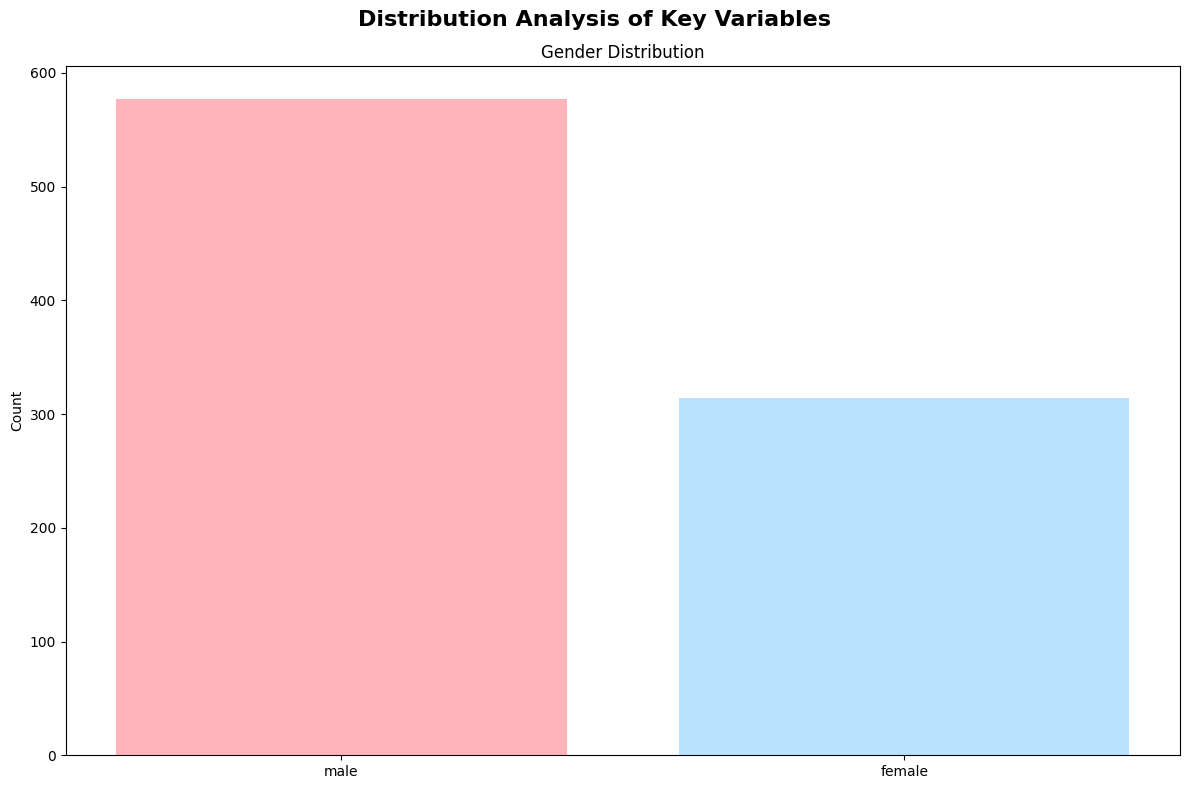

In [174]:
fig, ax3 = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')

# 3. Gender distribution
gender_counts = data['sex'].value_counts()
ax3.bar(gender_counts.index, gender_counts.values, color=['#ffb3ba', '#bae1ff'])
ax3.set_title('Gender Distribution')
ax3.set_ylabel('Count')

plt.tight_layout()
plt.show()


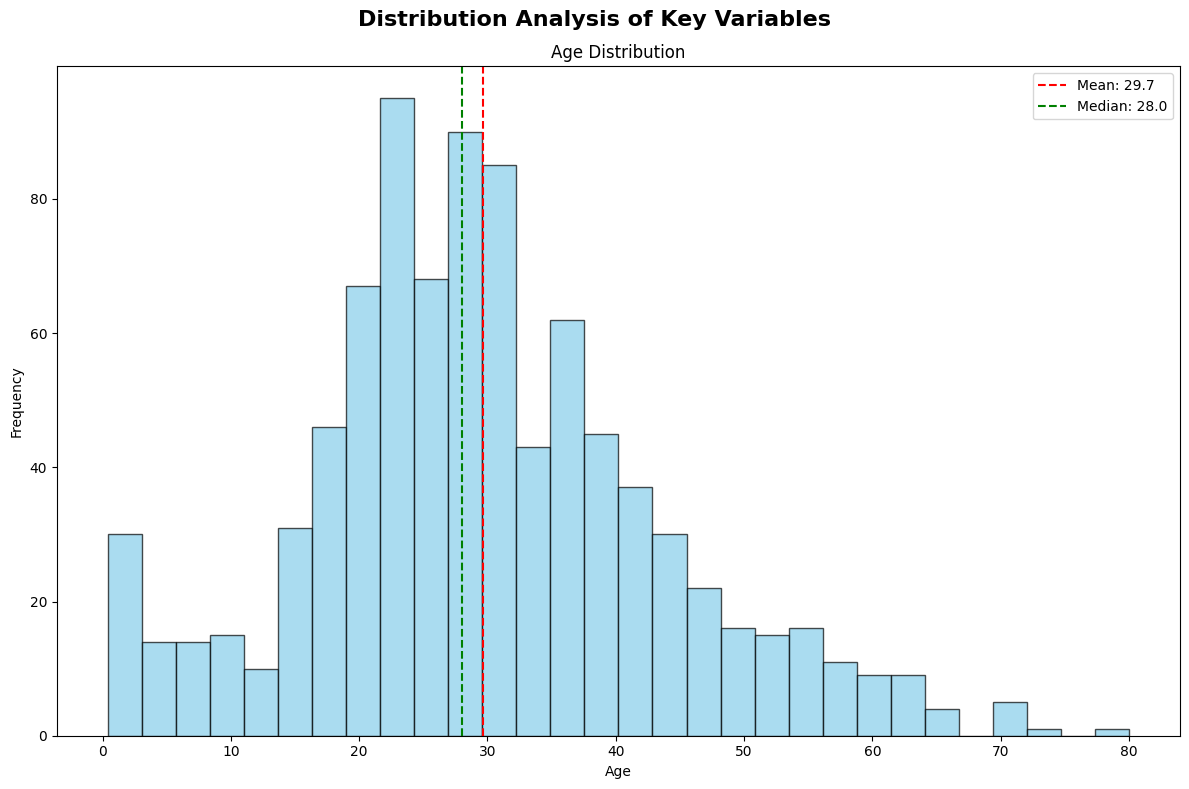

In [175]:
fig, ax4 = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')

# 4. Age distribution with statistics
age_data = data['age'].dropna()
ax4.hist(age_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax4.axvline(age_data.mean(), color='red', linestyle='--', label=f'Mean: {age_data.mean():.1f}')
ax4.axvline(age_data.median(), color='green', linestyle='--', label=f'Median: {age_data.median():.1f}')
ax4.set_title('Age Distribution')
ax4.set_xlabel('Age')
ax4.set_ylabel('Frequency')
ax4.legend()


plt.tight_layout()
plt.show()


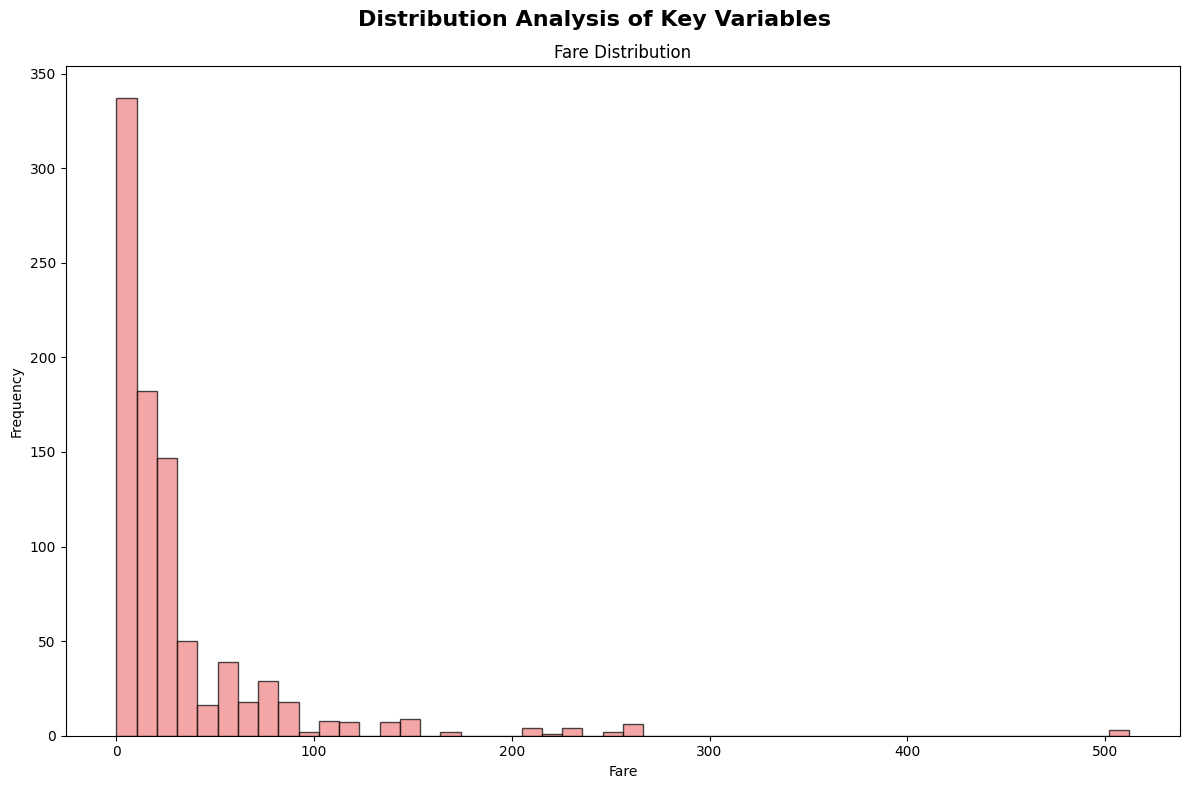

In [176]:
fig, ax5 = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')

# 5. Fare distribution (log scale due to skewness)
fare_data = data['fare'].dropna()
ax5.hist(fare_data, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
ax5.set_title('Fare Distribution')
ax5.set_xlabel('Fare')
ax5.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


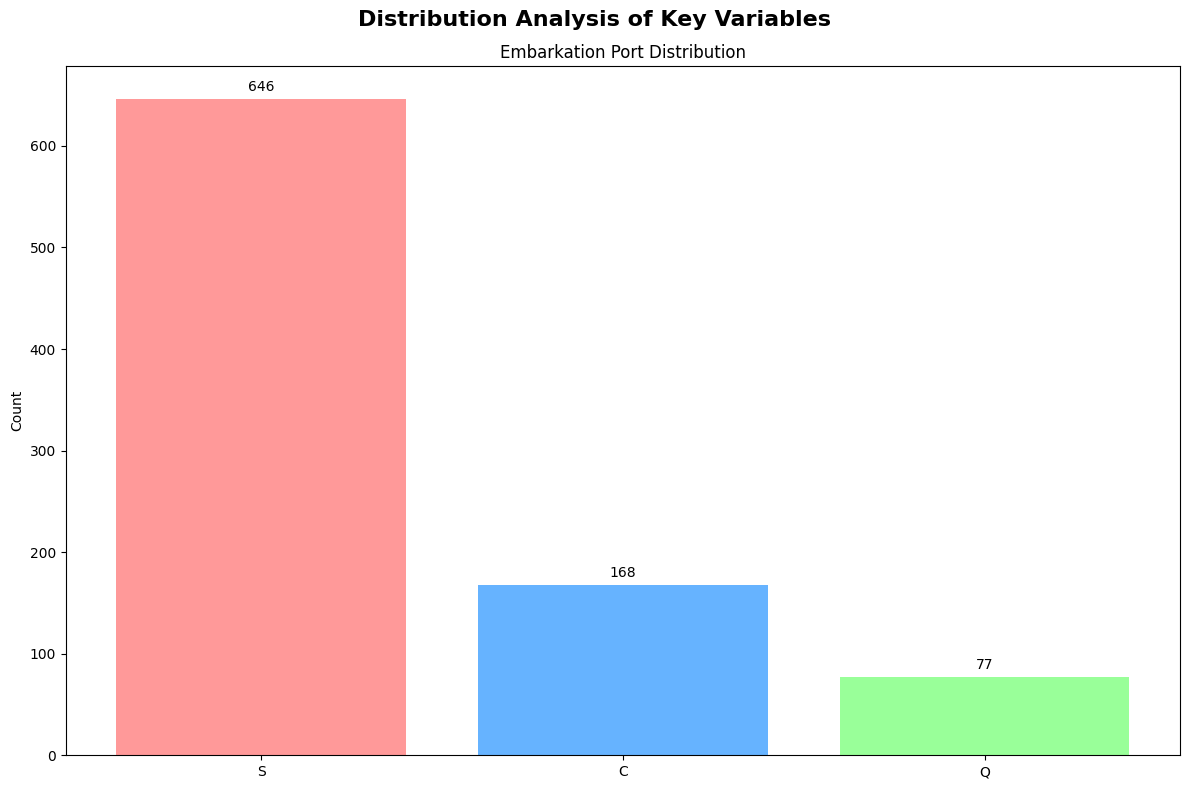

In [177]:
fig, ax6 = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')

# 6. Embarked distribution
embarked_counts = data['embarked'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
bars = ax6.bar(embarked_counts.index, embarked_counts.values, color=colors)
ax6.set_title('Embarkation Port Distribution')
ax6.set_ylabel('Count')
# Adding value labels on bars
for bar, value in zip(bars, embarked_counts.values):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<b>Outlier Detection</b>

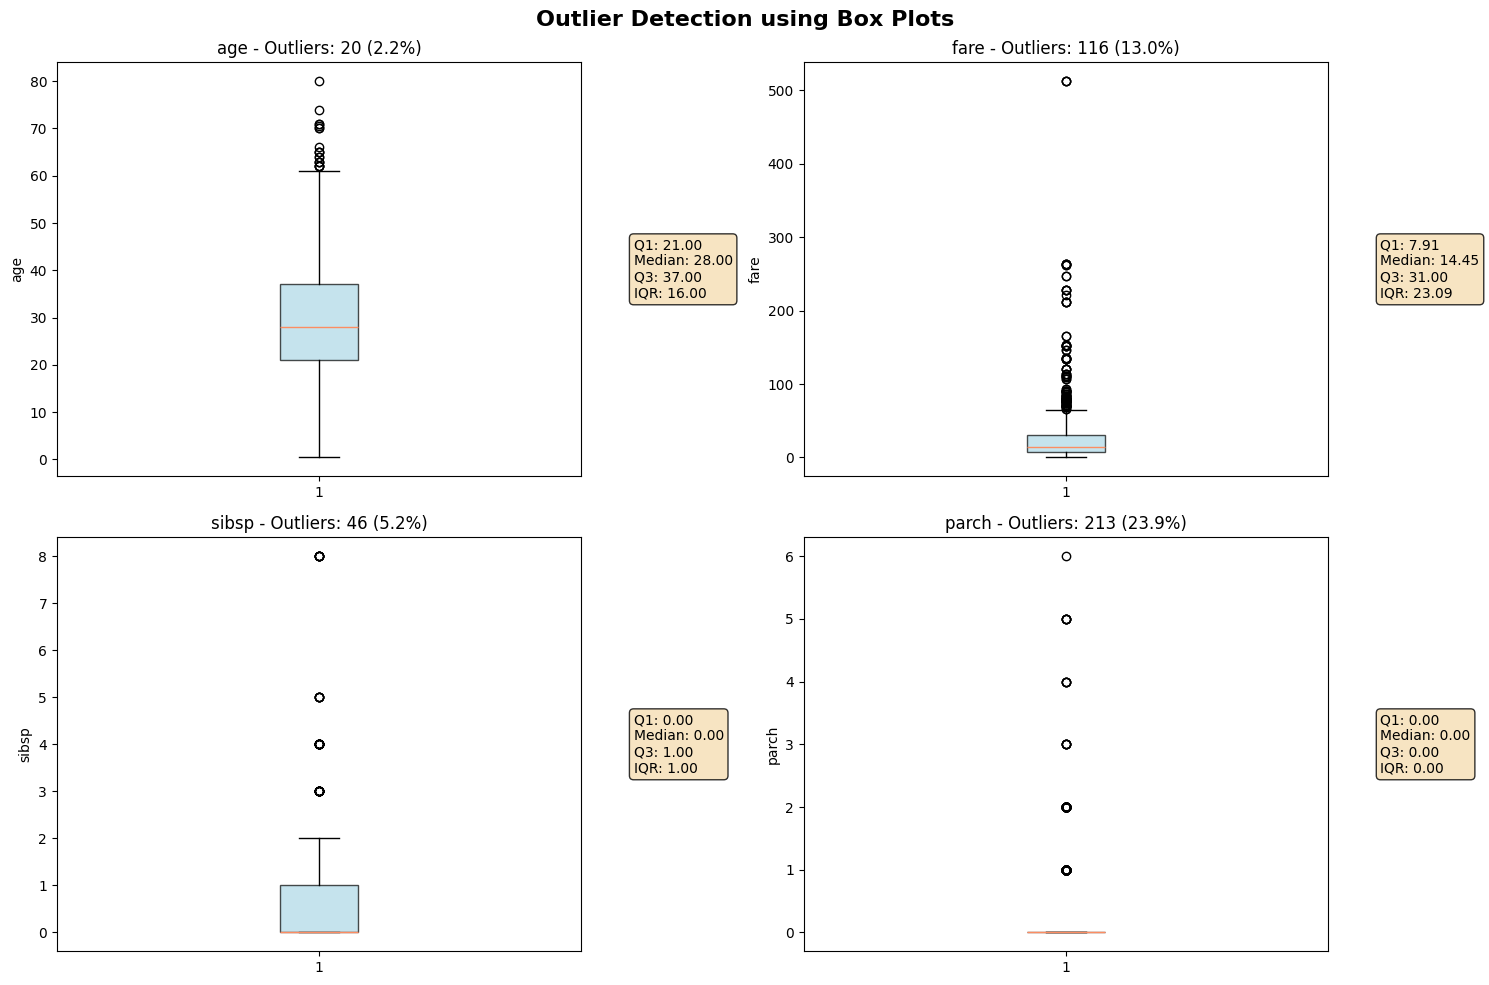

In [178]:
# Numerical columns for outlier detection
numerical_cols = ['age', 'fare', 'sibsp', 'parch']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Outlier Detection using Box Plots', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_cols):
    row = i // 2
    col_idx = i % 2
    ax = axes[row, col_idx]
    
    # Box plot
    data_clean = data[col].dropna()
    bp = ax.boxplot(data_clean, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    
    # Calculating IQR and outliers
    Q1 = data_clean.quantile(0.25)
    Q3 = data_clean.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
    
    ax.set_title(f'{col} - Outliers: {len(outliers)} ({len(outliers)/len(data_clean)*100:.1f}%)')
    ax.set_ylabel(col)
    
    # Statistics text
    stats_text = f'Q1: {Q1:.2f}\nMedian: {data_clean.median():.2f}\nQ3: {Q3:.2f}\nIQR: {IQR:.2f}'
    ax.text(1.1, 0.5, stats_text, transform=ax.transAxes, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
            verticalalignment='center')

plt.tight_layout()
plt.show()

In [179]:
# Detailed outlier analysis
print("Detailed Outlier Analysis:")
for col in numerical_cols:
    data_clean = data[col].dropna()
    Q1 = data_clean.quantile(0.25)
    Q3 = data_clean.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
    
    print(f"\n{col}:")
    print(f"  Total values: {len(data_clean)}")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(data_clean)*100:.2f}%)")
    print(f"  Range: {data_clean.min():.2f} - {data_clean.max():.2f}")
    print(f"  IQR bounds: {lower_bound:.2f} - {upper_bound:.2f}")
    if len(outliers) > 0:
        print(f"  Outlier range: {outliers.min():.2f} - {outliers.max():.2f}")

Detailed Outlier Analysis:

age:
  Total values: 891
  Outliers: 20 (2.24%)
  Range: 0.42 - 80.00
  IQR bounds: -3.00 - 61.00
  Outlier range: 62.00 - 80.00

fare:
  Total values: 891
  Outliers: 116 (13.02%)
  Range: 0.00 - 512.33
  IQR bounds: -26.72 - 65.63
  Outlier range: 66.60 - 512.33

sibsp:
  Total values: 891
  Outliers: 46 (5.16%)
  Range: 0.00 - 8.00
  IQR bounds: -1.50 - 2.50
  Outlier range: 3.00 - 8.00

parch:
  Total values: 891
  Outliers: 213 (23.91%)
  Range: 0.00 - 6.00
  IQR bounds: 0.00 - 0.00
  Outlier range: 1.00 - 6.00


<b>Relationships between variables</b>

Correlation Analysis:
            age   fare  sibsp  parch  survived
age       1.000  0.088 -0.319 -0.214    -0.087
fare      0.088  1.000  0.160  0.216     0.257
sibsp    -0.319  0.160  1.000  0.415    -0.035
parch    -0.214  0.216  0.415  1.000     0.082
survived -0.087  0.257 -0.035  0.082     1.000


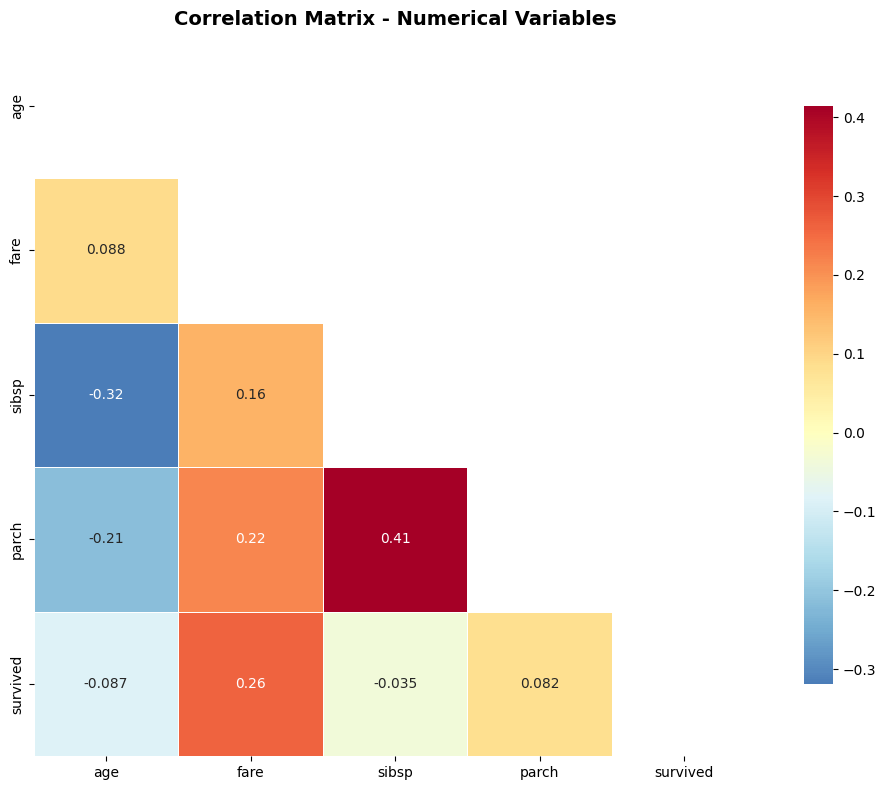

In [180]:
# Correlation matrix for numerical variables
print("Correlation Analysis:")
numerical_data = data[numerical_cols + ['survived']].corr()
print(numerical_data.round(3))


# Correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(numerical_data, dtype=bool))
sns.heatmap(numerical_data, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

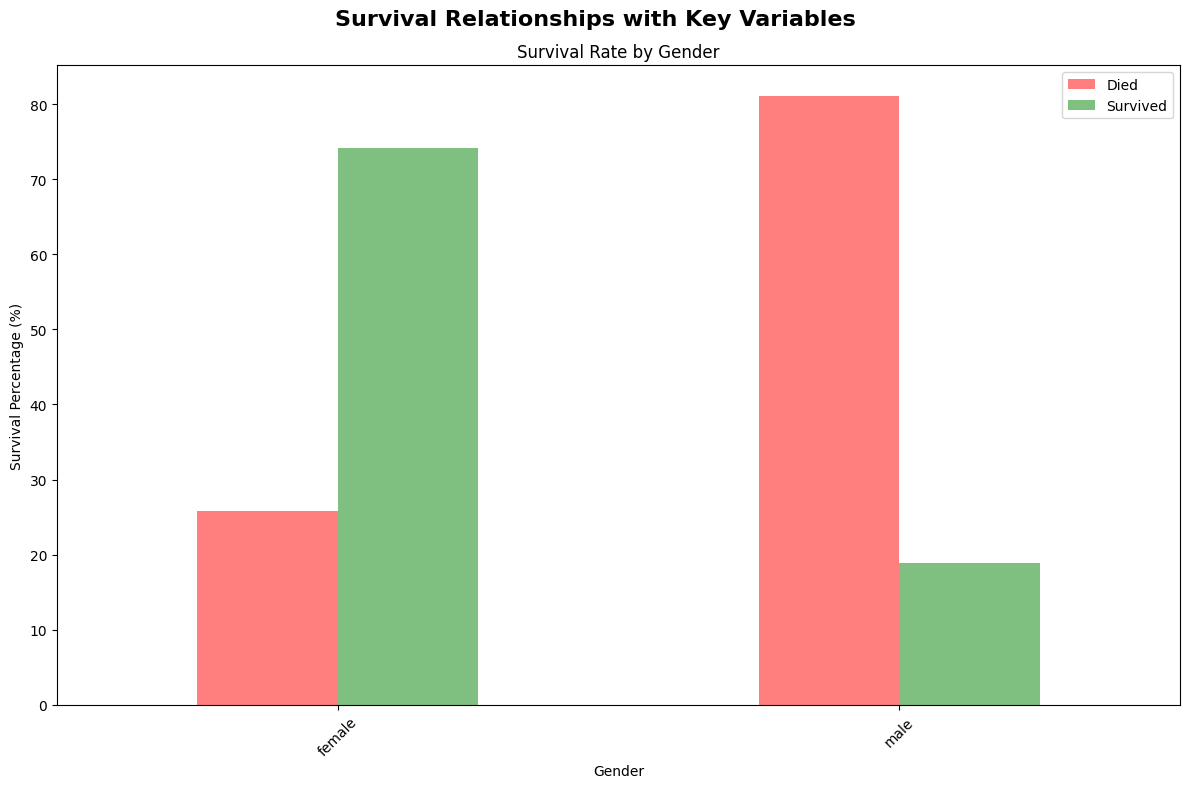

In [181]:
# Survival analysis by different factors
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Survival Relationships with Key Variables', fontsize=16, fontweight='bold')

# 1. Survival by Gender
survival_by_gender = pd.crosstab(data['sex'], data['survived'], normalize='index') * 100
survival_by_gender.plot(kind='bar', ax=ax1, color=['#ff7f7f', '#7fbf7f'])
ax1.set_title('Survival Rate by Gender')
ax1.set_ylabel('Survival Percentage (%)')
ax1.set_xlabel('Gender')
ax1.legend(['Died', 'Survived'])
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

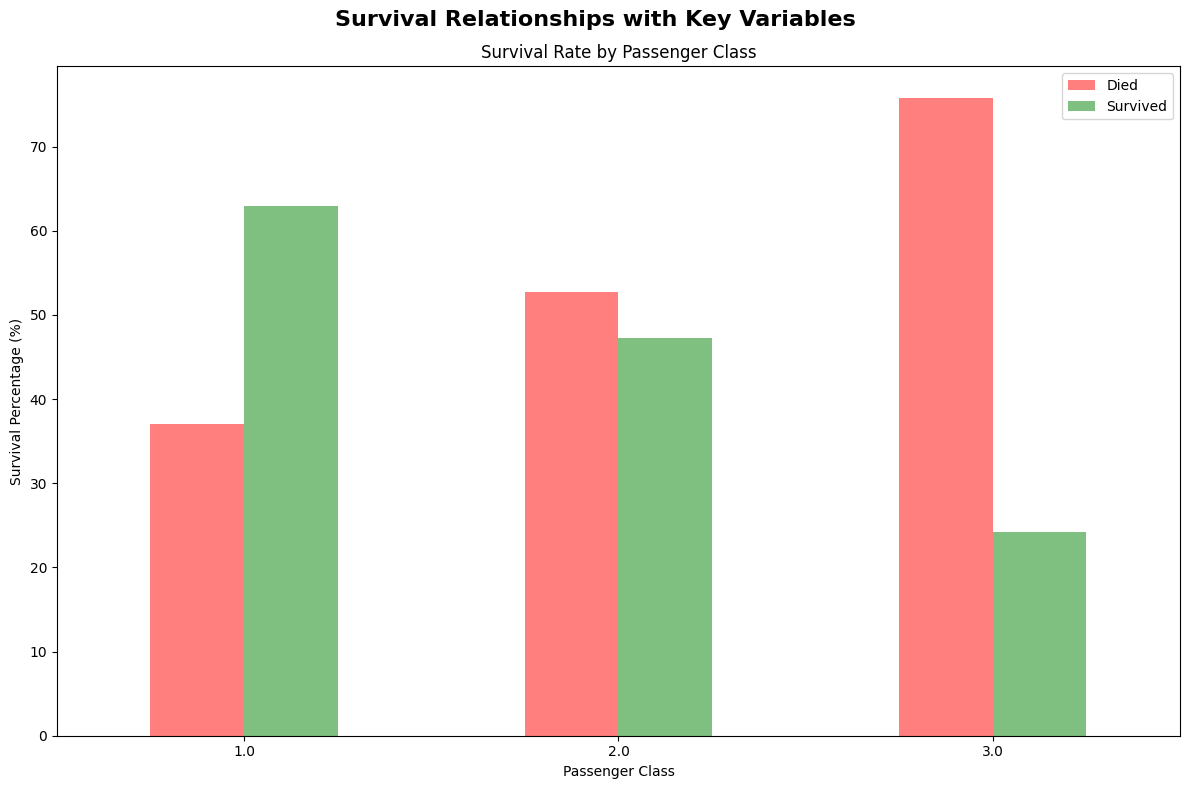

In [182]:
fig, ax2 = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Survival Relationships with Key Variables', fontsize=16, fontweight='bold')

# 2. Survival by Passenger Class
survival_by_class = pd.crosstab(data['pclass'], data['survived'], normalize='index') * 100
survival_by_class.plot(kind='bar', ax=ax2, color=['#ff7f7f', '#7fbf7f'])
ax2.set_title('Survival Rate by Passenger Class')
ax2.set_ylabel('Survival Percentage (%)')
ax2.set_xlabel('Passenger Class')
ax2.legend(['Died', 'Survived'])
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

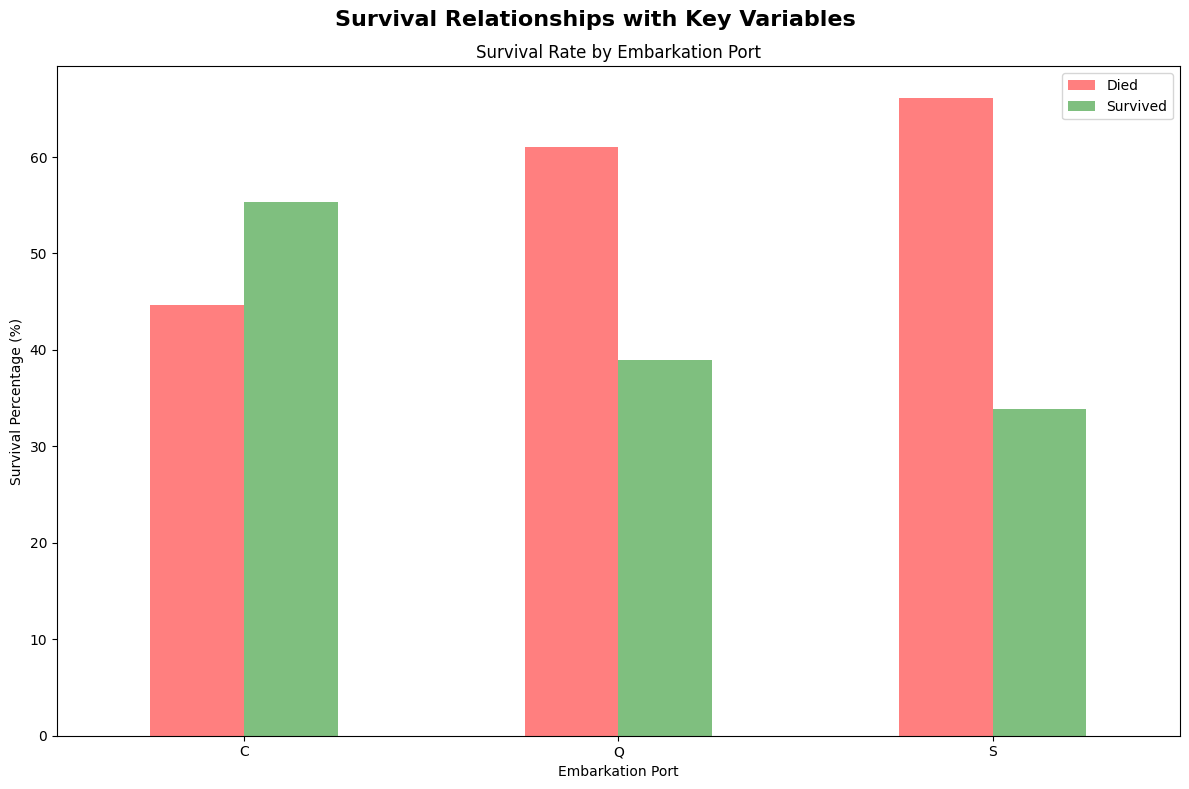

In [183]:
fig, ax3 = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Survival Relationships with Key Variables', fontsize=16, fontweight='bold')

# 3. Survival by Embarkation Port
survival_by_embarked = pd.crosstab(data['embarked'], data['survived'], normalize='index') * 100
survival_by_embarked.plot(kind='bar', ax=ax3, color=['#ff7f7f', '#7fbf7f'])
ax3.set_title('Survival Rate by Embarkation Port')
ax3.set_ylabel('Survival Percentage (%)')
ax3.set_xlabel('Embarkation Port')
ax3.legend(['Died', 'Survived'])
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

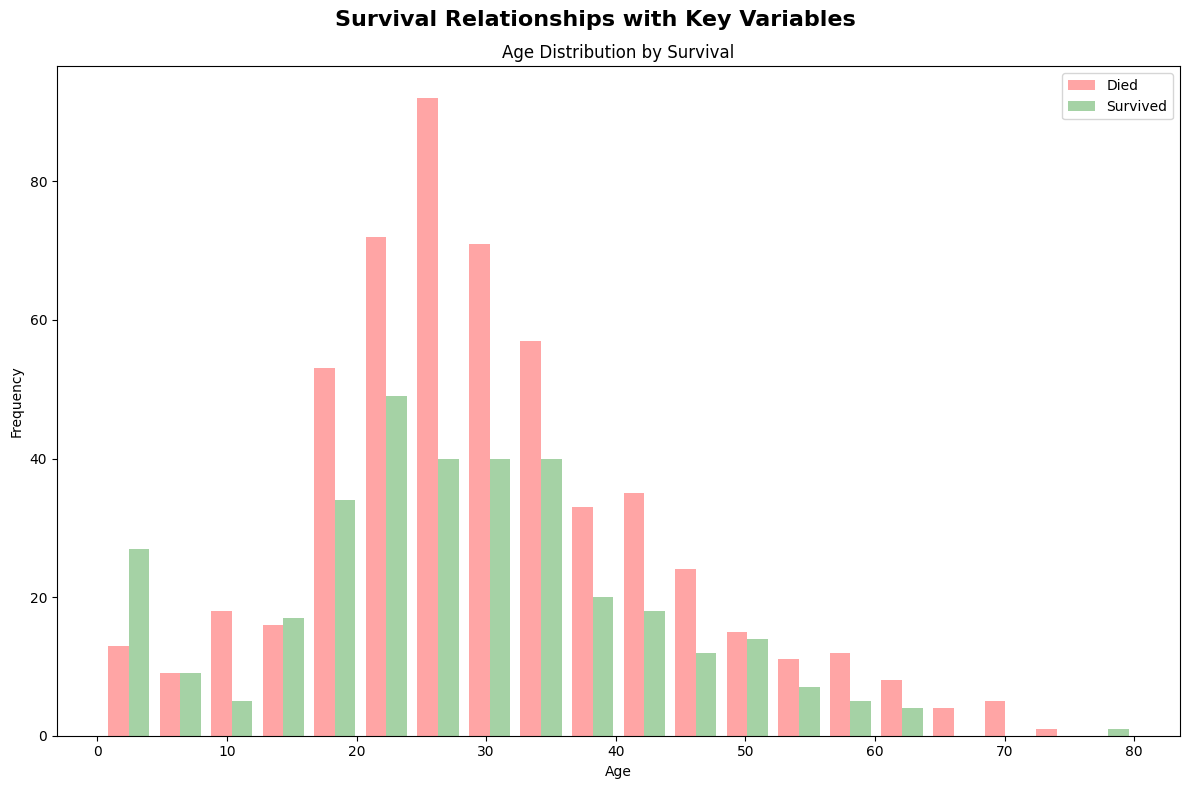

In [184]:
fig, ax4 = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Survival Relationships with Key Variables', fontsize=16, fontweight='bold')

# 4. Age distribution by survival
survived_ages = data[data['survived'] == 1]['age'].dropna()
died_ages = data[data['survived'] == 0]['age'].dropna()
ax4.hist([died_ages, survived_ages], bins=20, alpha=0.7, 
         label=['Died', 'Survived'], color=['#ff7f7f', '#7fbf7f'])
ax4.set_title('Age Distribution by Survival')
ax4.set_xlabel('Age')
ax4.set_ylabel('Frequency')
ax4.legend()

plt.tight_layout()
plt.show()

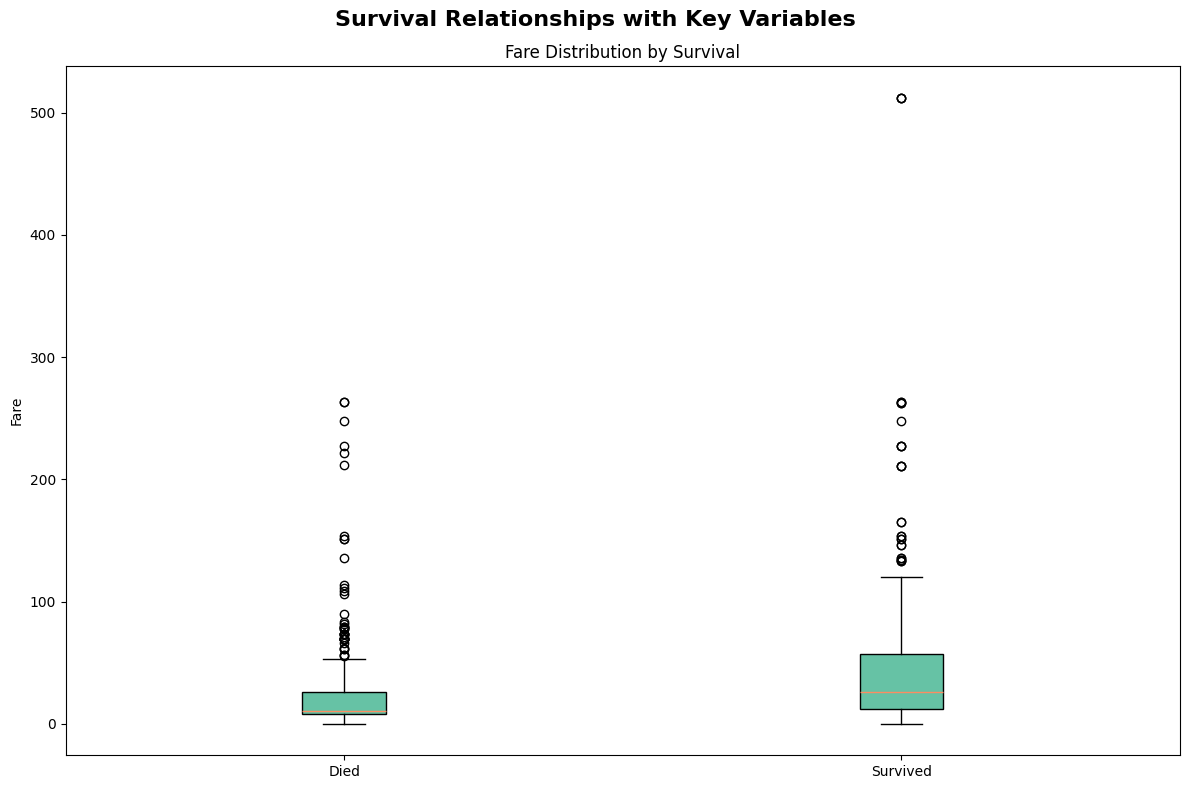

In [185]:
fig, ax5 = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Survival Relationships with Key Variables', fontsize=16, fontweight='bold')

# 5. Fare distribution by survival
survived_fare = data[data['survived'] == 1]['fare'].dropna()
died_fare = data[data['survived'] == 0]['fare'].dropna()
ax5.boxplot([died_fare, survived_fare], labels=['Died', 'Survived'], patch_artist=True)
ax5.set_title('Fare Distribution by Survival')
ax5.set_ylabel('Fare')

plt.tight_layout()
plt.show()

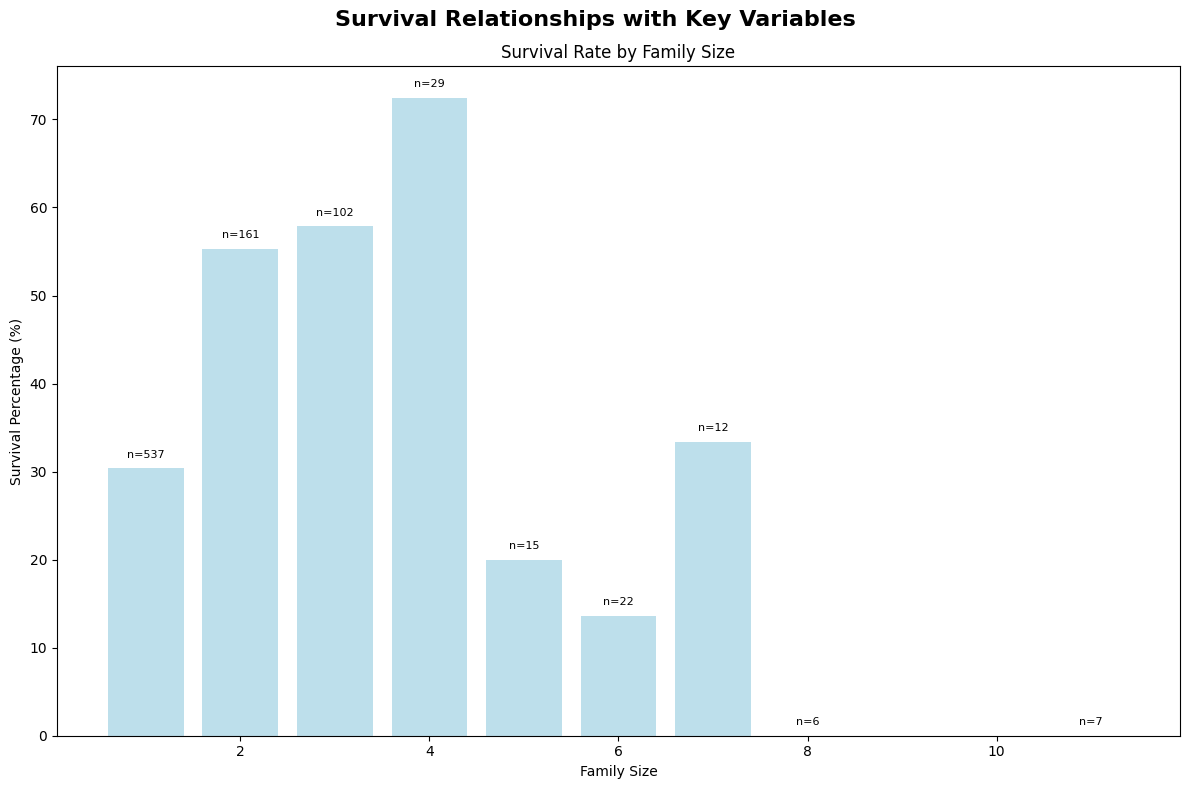

In [186]:
fig, ax6 = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Survival Relationships with Key Variables', fontsize=16, fontweight='bold')

# 6. Family size impact
data['familysize'] = data['sibsp'] + data['parch'] + 1  # Including self
family_survival = data.groupby('familysize')['survived'].agg(['mean', 'count']).reset_index()
family_survival = family_survival[family_survival['count'] >= 5]  # Filter for meaningful sample sizes

bars = ax6.bar(family_survival['familysize'], family_survival['mean'] * 100, 
               color='lightblue', alpha=0.8)
ax6.set_title('Survival Rate by Family Size')
ax6.set_xlabel('Family Size')
ax6.set_ylabel('Survival Percentage (%)')

# count labels on bars
for bar, count in zip(bars, family_survival['count']):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'n={int(count)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

<b>Statistical Test</b>

In [187]:
# Chi-square test for categorical variables
print("Testing relationships with survival using Chi-square tests:")

categorical_vars = ['sex', 'pclass', 'embarked']
for var in categorical_vars:
    # Contingency table
    contingency_table = pd.crosstab(data[var], data['survived'])
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\n{var} vs Survival:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Degrees of freedom: {dof}")
    print(f"  Relationship: {'Significant' if p_value < 0.05 else 'Not significant'} (α = 0.05)")

# T-test for numerical variables
print("\nTesting numerical variables using T-tests:")

for var in ['age', 'fare']:
    # Data for survivors and non-survivors
    survived_data = data[data['survived'] == 1][var].dropna()
    died_data = data[data['survived'] == 0][var].dropna()
    
    # Independent t-test
    t_stat, p_value = ttest_ind(survived_data, died_data)
    
    print(f"\n{var} difference between survivors and non-survivors:")
    print(f"  Survived mean: {survived_data.mean():.2f}")
    print(f"  Died mean: {died_data.mean():.2f}")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Difference: {'Significant' if p_value < 0.05 else 'Not significant'} (α = 0.05)")


Testing relationships with survival using Chi-square tests:

sex vs Survival:
  Chi-square statistic: 260.7170
  p-value: 0.000000
  Degrees of freedom: 1
  Relationship: Significant (α = 0.05)

pclass vs Survival:
  Chi-square statistic: 102.8890
  p-value: 0.000000
  Degrees of freedom: 2
  Relationship: Significant (α = 0.05)

embarked vs Survival:
  Chi-square statistic: 25.9645
  p-value: 0.000002
  Degrees of freedom: 2
  Relationship: Significant (α = 0.05)

Testing numerical variables using T-tests:

age difference between survivors and non-survivors:
  Survived mean: 28.16
  Died mean: 30.60
  T-statistic: -2.5946
  p-value: 0.009627
  Difference: Significant (α = 0.05)

fare difference between survivors and non-survivors:
  Survived mean: 48.40
  Died mean: 22.12
  T-statistic: 7.9392
  p-value: 0.000000
  Difference: Significant (α = 0.05)


<h2 style="text-align:center"><b>Key Findings Summary</b></h2> 

This section explores original insights derived from the Titanic dataset. The aim is to go beyond commonly available observations and reveal subtle patterns that add analytical depth to the EDA.

1. **Cabin Information as a Wealth Proxy :** 

    Passengers with non-null values in the 'Cabin' column showed significantly higher survival rates. This likely reflects access to better accommodation and lifeboats, as cabins were mostly available to first-class passengers.  
    *Feature idea:* Create a binary feature `HasCabinInfo` to indicate whether a cabin number is recorded.

2. **Title Extraction from Names :**

    Passenger titles such as Mr, Miss, Master, Dr, and Countess carry important information about social status, age, and gender.  
    *Observation:*  
    -> Titles like Master (young boys) had very high survival rates.  
    -> Rare titles (Countess, Sir, Don) often belonged to nobility and had higher survival chances.  
    *Feature idea:* Extract `Title` from the `Name` column to create a new categorical feature.

3. **Officer Titles and Sacrificial Behavior :** 

    Titles such as Capt, Col, Major, and Rev were associated with lower survival rates. These passengers may have prioritized others during evacuation, possibly reflecting leadership or ethical responsibility.

4. **Fare Per Person :**

    Rather than using the total ticket fare, dividing the fare by (SibSp + Parch + 1) gives a more individual-level indicator of economic status.  
    *Observation:* Passengers with higher per-person fare were more likely to survive regardless of their class.  
    *Feature idea:* Create a new feature `Fare_per_person`.

5. **Shared Ticket Number Groups :**

    Passengers with the same ticket number may have traveled together, even if their family size (SibSp + Parch) was zero.  
    *Observation:* Small groups of 2–4 sharing a ticket had higher survival rates than solo travelers or large groups.  
    *Feature idea:* Create `GroupSizeByTicket` to capture groupings beyond family relationships.

6. **Inconsistencies Between Pclass and Fare :**

    Some third-class passengers paid higher fares than second-class passengers. These individuals tended to have higher survival rates, suggesting factors like room location or bundled ticket services.

7. **Deck Level from Cabin Information :**

    The first character in the 'Cabin' string can be used to infer deck level (e.g., A, B, C).  
    *Observation:* Passengers on Decks B and C had higher survival, while those on Deck F and G had the lowest.  
    *Feature idea:* Extract a new `Deck` feature from the `Cabin` column.

8. **Length of Passenger Name :**

    An unusual yet interesting observation is that passengers with longer names often had higher survival rates. This may reflect social prestige or formal naming conventions associated with wealthier individuals.  
    *Feature idea:* Create a `NameLength` feature to examine its correlation with survival.



<h2 style="text-align:center"><b>Future Recommendations for Analysis</b></h2>

Based on the current exploratory data analysis (EDA) of the Titanic dataset, the following suggestions can guide future work for deeper insights and enhanced predictive modeling:

1. **Unsupervised Learning for Passenger Segmentation :**  
   
   Use clustering algorithms like **K-Means**, **DBSCAN**, or **Hierarchical Clustering** to group passengers based on socio-demographic and travel features. This could uncover hidden segments such as high-risk traveler profiles or common travel patterns.

2. **Hypothesis Testing and Statistical Inference :**  
   
   Perform hypothesis testing (e.g., **Chi-square**, **T-tests**, **ANOVA**) to validate significant relationships between survival and other categorical/numerical variables. This adds statistical rigor to your observations.

3. **Explainability and Interpretability :**  
   
   Integrate model explanation techniques like **SHAP** (SHapley Additive exPlanations) or **LIME** to interpret feature importance and decision boundaries. This is especially useful for communicating results to non-technical stakeholders.

4. **Comparative Study with Similar Historical Datasets :**  
   
   Identify and analyze other maritime or disaster datasets to perform **comparative EDA**. This may help in generalizing safety patterns or developing more universal evacuation policies.

5. **Interactive Dashboards for Presentation :**  
   
   Use tools like **Plotly Dash**, **Streamlit**, or **Tableau Public** to create interactive dashboards that dynamically present the EDA results. This is particularly helpful for showcasing findings in reviews or demos.